## Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import random

## Dataset

In [2]:
data = pd.read_csv("./dataset/Fertility.csv")
data.head(10)

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,N
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,N


## Basic EDA

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,0
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,0
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,0
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,0
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,0


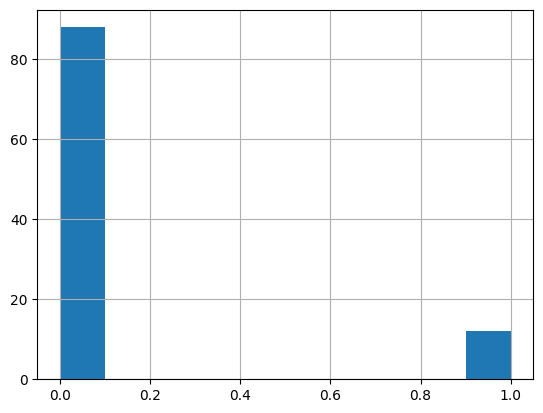

In [3]:
data['diagnosis'] = data['diagnosis'].map({'N': 0, 'O': 1})
data["diagnosis"].hist()
data.head(10)

In [4]:
# extract features and output
features = data.values[:, :-1]
Y = data.values[:, 9:]
print(Y.shape)
Y = np.squeeze(Y)
print(Y.shape)

(100, 1)
(100,)


In [5]:
features_list = [0,1,2,3,4,5,6,7,8]
feature1 = random.randint(0, 8)
features_list.remove(feature1)
feature2 = random.choice(features_list)
random_features = [feature1, feature2]
(feature1, feature2)

(4, 3)

In [6]:
X = features[:, [feature1, feature2]]
# X = features[:, [1, 8]]
print(X.shape, Y.shape)

(100, 2) (100,)


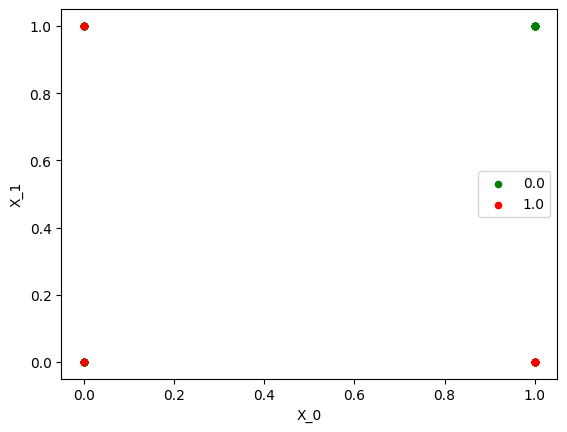

In [7]:
from pandas import DataFrame
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'green', 1:'red'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [9]:
rg = LogisticRegression()
rg.fit(X_train, Y_train)

LogisticRegression()

In [10]:
Y_pred = rg.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Precision: ", precision_score(Y_test, Y_pred, zero_division=0))
print("Recall: ", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))

Accuracy:  0.9090909090909091
Confusion Matrix:
 [[30  0]
 [ 3  0]]
Precision:  0.0
Recall:  0.0
F1 Score: 0.0
ROC AUC Score: 0.5
